# Objetivo: Predecir la posición final de la partida de cada jugador.

## PUBG: Battlegrounds es un videojuego de batalla en línea multijugador masivo. Una partida puede llegar a tener hasta 100 jugadores, y en cada una de las mismas, todos los jugadores saltan en paracaídas desde un avión a una isla, donde tienen la libertad de moverse hacia un lugar determinado que ellos mismos elijan y buscan armas y equipamiento para matar a otros jugadores mientras evitan ser asesinados. Los jugadores pueden estar en equipos, que se clasifican al final del juego en función de cuántos otros equipos todavía están vivos o cuando son eliminados. En el juego, los jugadores pueden recoger diferentes municiones, revivir a compañeros de equipo caídos pero no fuera de combate, conducir vehículos, nadar, correr, disparar y experimentar todas las consecuencias, como caer demasiado lejos o atropellarse a sí mismos, que puede resultar en una autoeliminación. El área segura disponible dentro del juego, disminuye en tamaño durante el transcurso de la partida, dirigiendo a los jugadores sobrevivientes a áreas más reducidas y forzando enfrentamientos. El último jugador o equipo en pie gana la partida.

## Desde éste primer acercamiento buscaremos buscar los polos extremos de los jugadores que conviven dentro del juego, segmentando a los jugadores a quienes se les pueden ofrecer una mejora o "boost" dentro del juego para compensar la falta de habilidad y, por otro lado, a los jugadores que tienen una habilidad alta para ofrecer cosméticos, ya que, el mundo de las microtransacciones se ha vuelto un elemento clave dentro de los juegos en línea, ya sea, competitivo o no, incluso los streamers con una gran cantidad de público y alcance.
## Contexto analítico:


1.- DBNOs - : número de jugadores enemigos derribados.
<br> <br/>
2.- assists - asistencias: número de jugadores enemigos que este jugador dañó y que fueron asesinados por sus compañeros de equipo. 
<br> <br/>
3.- boosts - número de elementos de aumentos utilizados. 
<br> <br/>
4.- damageDealt - Daño total infligido.Nota: Se resta el daño autoinfligido. 
<br> <br/>
5.- headshotKills - número de jugadores enemigos asesinados con disparos a la cabeza. 
<br> <br/>
6.- heals - número de elementos curativos utilizados.
<br> <br/>
7.- Id - ID del jugador 
<br> <br/>
8.- killPlace - clasificación en la partida del número de jugadores enemigos asesinados. 9.- killPoints - clasificación externa del jugador basada en muertes. (Piense en esto como una clasificación Elo donde sólo los asesinatos importan. Si hay un valor distinto de -1 en RankPoints, entonces cualquier 0 en KillPoints debe tratarse como 'Ninguno'. 10.- killStreaks - número máximo de jugadores enemigos asesinados en un corto período de tiempo. 
<br> <br/>
11.- kills - número de jugadores enemigos asesinados. 
<br> <br/>
12.-longestKill - distancia más larga entre el jugador y el jugador asesinado en el momento de la muerte.Esto puede ser engañoso, ya que derribar a un jugador y alejarse puede generar una gran estadística de muertes más largas. 
<br> <br/>
13.- matchDuration - duración de la partida en segundos. 
<br> <br/>
14.- matchId - ID para identificar la partida. 
<br> <br/>
15.- matchType - modo de juego del que provienen los datos.Los modos estándar son “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp” y “squad-fpp”; otros modos son de eventos o partidos personalizados. 
<br> <br/>
16.- rankPoints - clasificación de jugador similar a Elo. El valor de -1 reemplaza a 'Ninguno'. 
<br> <br/>
17.- revives - revive: número de veces que este jugador revivió a sus compañeros de equipo. 
<br> <br/>
18.-rideDistance - distancia total recorrida en vehículos medida en metros. 
<br> <br/>
19.- roadKills - número de muertes en un vehículo. 
<br> <br/>
20.- swimDistance - distancia total recorrida nadando medida en metros. 
<br> <br/>
21.- teamKills - número de veces que este jugador mató a un compañero de equipo.
<br> <br/>
22.- vehicleDestroys - número de vehículos destruidos. 
<br> <br/>
23.- walkDistance - distancia total recorrida a pie medida en metros. 
<br> <br/>
24.- weaponsAcquired - número de armas recogidas. 
<br> <br/>
25.- winPoints - clasificación externa del jugador basada en las ganancias.(Piense en esto como una clasificación Elo donde solo importa ganar).Si hay un valor distinto de -1 en RankPoints, entonces cualquier 0 en WinPoints debe tratarse como 'Ninguno'. 
<br> <br/>
26.- groupId - ID para identificar un grupo dentro de una coincidencia.Si el mismo grupo de jugadores juega en partidos diferentes, tendrán un ID de grupo diferente cada vez. 27.- numGroups - número de grupos de los que tenemos datos en la partida. 
<br> <br/>
28.- maxPlace - peor ubicación de la que tenemos datos en el partido.Es posible que esto no coincida con numGroups, ya que a veces los datos omiten las ubicaciones. 
<br> <br/>
29.- winPlacePerc - el objetivo de la predicción.Esta es una ubicación ganadora porcentual, donde 1 corresponde al 1er lugar y 0 corresponde al último lugar del partido. Se calcula a partir de maxPlace, no de numGroups

In [1]:
!pip install statsmodels
!pip install mlxtend 
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, r2_score


dataset1 = 'C:\\Users\\david\\Desktop\\data_science\\datsets'
os.chdir(dataset1)
df_pubg = pd.read_csv("pubg.csv", sep = ',') 
# df_pubg.head()

# Variable target: winPlacePerc
La variable objetivo es de tipo **numérica**, por lo que el modelo a desarrollar será de tipo **Aprendizaje Supervisado: Regresión**. 
<br> <br/>
A continuación se presentarán algunas estadísticas para entender el comportamiento, formato y distribución de esta variable. 


In [2]:
variable_target = df_pubg['winPlacePerc']
variable_target.describe()


count    4.446965e+06
mean     4.728216e-01
std      3.074050e-01
min      0.000000e+00
25%      2.000000e-01
50%      4.583000e-01
75%      7.407000e-01
max      1.000000e+00
Name: winPlacePerc, dtype: float64

Text(0.5, 1.0, 'Probabilidad de placement')

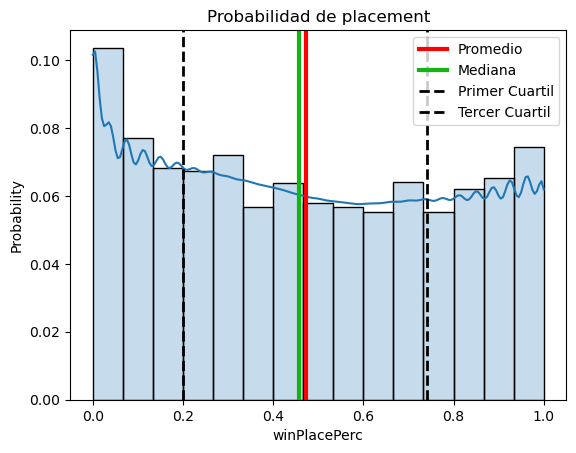

In [3]:
# Histograma variable target 
# Primero calculo algunas medidas que quiero presentar 
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df_pubg,
             x = 'winPlacePerc',
             bins = 15,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Probabilidad de placement')

## Análisis Variable Target: SalePrice
Se puede observar que la variable tiene una distribución asimétrica. No hay una variación de la mediana y el promedio. La mayor concentración la observamos a la izquierda, donde se concentran la mayor cantidad de jugadores "casuales".

Esto indicaría que hay muchos jugadores entusiastas que sólo quieren disfrutar de un rato libre, que no dedican mucho tiempo al juego.

En el otro extremo encontramos que, hay mayor cantidad de jugadores que los promedio, que sí pudieran enfocarse más en ganar pero, mucho menos que los casuales.

## Exploración de valores vacíos
A continuación se evaluará la precencia de valores vacíos en las variables disponibles.

In [4]:
# Calculo y muestro variables con vacíos 
valores_nulos  = df_pubg.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print('Cantidad de columnas con valores vacíos:')
print(columnas_con_nulos.shape)
print('')
print('Variables con valores vacíos: ')
print(columnas_con_nulos.sort_values(ascending=False))

Cantidad de columnas con valores vacíos:
(1,)

Variables con valores vacíos: 
winPlacePerc    1
dtype: int64


## Filter feature selection
Se calcula el coeficiente de correlación de los Features con el target y se ordena de mayor a menor valor absoluto.
## Correlación
Lo próximo que analizaremos es la correlación entre cada variable disponible, y la variable target.

Algo a tener en cuenta es que este análisis, en principio, es válido únicamente para las variables numéricas. Dado que el dataset tiene muchas variables disponibles, haremos este análisis para detectar cuáles son las variables numéricas más relacionadas con la variable target, para detenernos en el análisis de algunas de ellas.

In [5]:
# Calculo matriz de correlación 
matriz_correlacion = df_pubg.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['winPlacePerc']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['winPlacePerc']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

C:\Users\david\AppData\Local\Temp\ipykernel_11020\8089702.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_pubg.corr(method='pearson')


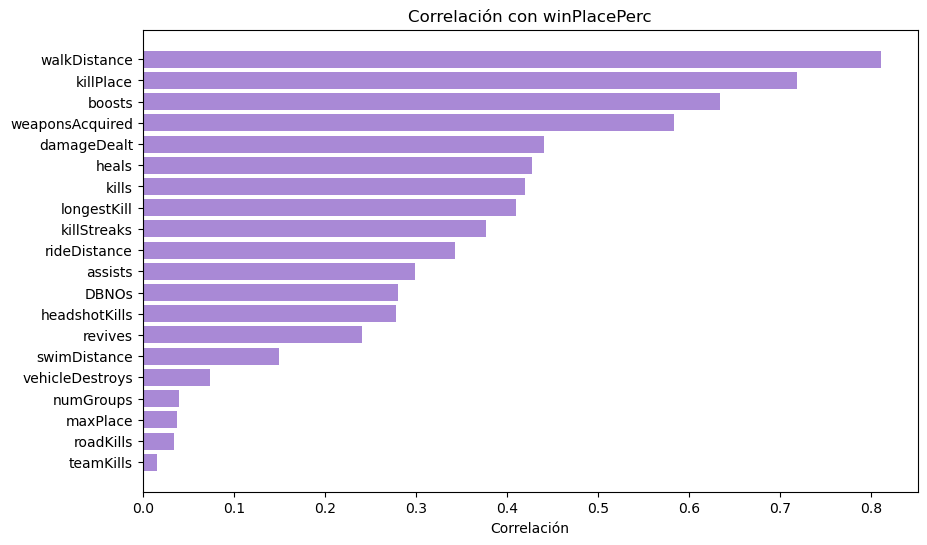

In [6]:
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con winPlacePerc')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

## walkDistance

Esta variable se relaciona bastante con el posicionamiento final de la partida, ya que, conforme avanza el juego, se deben de ir moviendo y ejecutando acciones que repercuten en el entorno y los demás jugadores. Por otro lado, se observa que, los jugadores que destruyen vehículos o se dedican a revivir, su rendimiento no es lo más óptimo, aunque se deba de efectuar en una partida por equipo.
## Correlaciones
Nos podemos enfocar de mejor manera con las variables que estén estrechamente relacionadas con nuestro objetivo y descartar las que no aportan directamente nada en nuestro análisis. Dicho esto, podemos inclusive hacer un corte hasta la variable "rideDistance" o incluso "revives" para considerarla relevante.

In [7]:
valores_nulos  = df_pubg.isnull().sum()
df_pubg_noNA = df_pubg.dropna() 
valores_nulos = df_pubg_noNA.isnull().sum()
valores_nulos

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [8]:
for i in df_pubg_noNA.index:
    if (df_pubg_noNA['winPlacePerc'][i] >= 0) and (df_pubg_noNA['winPlacePerc'][i] <= 0.2):
        df_pubg_noNA['winPlacePerc'][i] = "Bronce"
    elif (df_pubg_noNA['winPlacePerc'][i] > 0.2) and (df_pubg_noNA['winPlacePerc'][i] <= 0.4):
        df_pubg_noNA['winPlacePerc'][i] = "Plata"
    elif (df_pubg_noNA['winPlacePerc'][i] > 0.4) and (df_pubg_noNA['winPlacePerc'][i] <= 0.6):
        df_pubg_noNA['winPlacePerc'][i] = "Oro"
    elif (df_pubg_noNA['winPlacePerc'][i] > 0.6) and (df_pubg_noNA['winPlacePerc'][i] <= 0.8):
        df_pubg_noNA['winPlacePerc'][i] = "Platino"
    else : df_pubg_noNA['winPlacePerc'][i] = "Diamante"

C:\Users\david\AppData\Local\Temp\ipykernel_11020\753302344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pubg_noNA['winPlacePerc'][i] = "Oro"
C:\Users\david\AppData\Local\Temp\ipykernel_11020\753302344.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pubg_noNA['winPlacePerc'][i] = "Platino"
C:\Users\david\AppData\Local\Temp\ipykernel_11020\753302344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pubg_noNA['winPl

In [9]:
df_pubg_noNA

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,Oro
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,Platino
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,Platino
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,Bronce
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,Bronce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,Bronce
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,Plata
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,Oro
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,Platino


## Creación de data y target

In [10]:
df_data = df_pubg_noNA.drop(["winPlacePerc", "Id", "groupId", "matchId", "matchType"], axis = 'columns')
df_data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.00,0,0,0,60,1241,0,0,...,-1,0,0.0000,0,0.00,0,0,244.80,1,1466
1,0,0,91.47,0,0,0,57,0,0,0,...,1484,0,0.0045,0,11.04,0,0,1434.00,5,0
2,1,0,68.00,0,0,0,47,0,0,0,...,1491,0,0.0000,0,0.00,0,0,161.80,2,0
3,0,0,32.90,0,0,0,75,0,0,0,...,1408,0,0.0000,0,0.00,0,0,202.70,3,0
4,0,0,100.00,0,0,0,45,0,1,1,...,1560,0,0.0000,0,0.00,0,0,49.75,2,0


## En éste apartado ya se transformó la variable númerica a una cualitativa, donde ya se puede identificar a los jugadores que pudieran ofrecerles una promoción o descuentos, con base a su desempeño dentro del juego, segmentando de manera significativa los mercados objetivo y obteniendo ganancias potenciales.

In [11]:
df_class = df_pubg_noNA["winPlacePerc"]
df_class

0              Oro
1          Platino
2          Platino
3           Bronce
4           Bronce
            ...   
4446961     Bronce
4446962      Plata
4446963        Oro
4446964    Platino
4446965        Oro
Name: winPlacePerc, Length: 4446965, dtype: object

## Aplicación de validación Holdout 80 / 20. Entrena y prueba de regresión logística

In [12]:
data_train, data_test, class_train, class_test = train_test_split(df_data,
                                                                  df_class, 
                                                                  test_size = 0.2, 
                                                                  random_state = 31)                                        

In [13]:
model = LogisticRegression()
model.fit(data_train, class_train)

C:\Users\david\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
class_pred = model.predict(data_test)
accuracy = accuracy_score(class_test, class_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6197440276683086


## Los resultados obtenidos por el modelo, nos arroja que se encuentra "underfitting",ya que, aún no se encuentra aprendiendo del la manera correcta y por eso el Accuracy es bajo

# Data Wrangling

Clase 29

In [15]:
df_pubg_noNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [16]:
# Columnas nulas
nulos = df_pubg_noNA.isnull().sum()
nulos_pct = nulos / df_pubg_noNA.shape[0]
nulos_resumen = pd.DataFrame({'Cant_Nulos': nulos,
                              'Pct_Nulos': nulos_pct})

nulos_resumen = nulos_resumen.loc[nulos_resumen['Cant_Nulos'] > 0,]
nulos_resumen = nulos_resumen.sort_values(by = 'Cant_Nulos', ascending=False)
nulos_resumen

,Cant_Nulos,Pct_Nulos


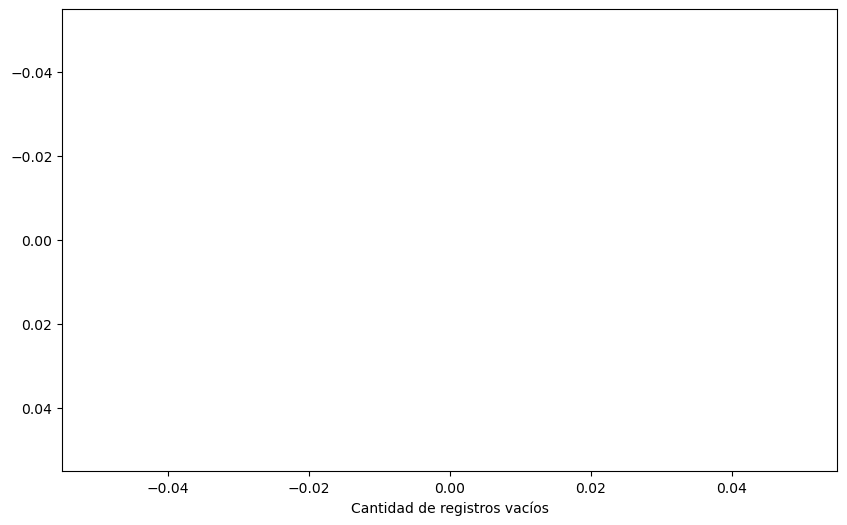

In [17]:
# Gráfico
plt.figure(figsize=(10,6))
plt.barh(nulos_resumen.index,
        nulos_resumen['Cant_Nulos'],
        color = '#8A2BE2')
plt.xlabel('Cantidad de registros vacíos')
plt.gca().invert_yaxis()
plt.show()

### Conclusión
Los datos se han limpiado previamente para llegar a éste punto, donde no existen registros vacíos para poder implementar el método.

La exploración de valores vacíos, ya se había realizado encontrando un único registro que posteriormente, se procedió a eliminar.

Al buscar las correlaciones, también se exploraron los datos que fueran nulos y con la previa.

Incluso tamibén hubo una transformación de datos de númericos a categóricos de acuerdo a percentiles por probabilidad de victoria a rangos: Bronce, Plata, Oro, Platino y Diamante.

# Storytelling
### Contextualización: 
Los deportes electrónicos son una carta abierta para captar la atención de todo público, desde niños hasta adultos, así que buscaremos la manera de obtener ingresos a partir de cualquier habilidad que presenten los jugadores.
### Estructura Narrativa:
Sabemos que hay jugadores que le dedican más de 8 horas de práctica en los videojuegos pero, también está la parte casual de la población que por tener otras tareas, no pueden dedicar el mismo tiempo que los demás, así que también ésto se puede ver reflejado en el desempeño en sus partidas, ahora bien, qué tal que podamos venderles u ofrecerles mejoras para sus personas y de ésta manera disfruten más el videojuego sin gastar una inmensa cantidad de horas pero, sí a un coste no tan elevado de dinero real. Y por otra parte tenemos a los jugadores dedicados que tienen mucha más habilidad que los jugadores promedio, a ellos podemos ofrecerles mejoras visuales dentro del juego, simplemente para que sus avatares, luzcan de una mejor manera. De éste modo, podemos ofrecerles a todo nuestro público maneras de seguir disfrutando el contenido que la empresa desarrolladora ofrece, segmentando a los jugadores por divisiones y analizar el tipo de oferta que se les puede enviar como oferta.
### Personificación de Datos:
Las divisiones planeadas para nuestros objetivos son: Bronce, Plata, Oro, Platino y Diamante, ésto asignado de acuerdo a la probabilidad de victoria que tenga cada jugador. De este modo pueden ser más identificables cada categoria.

### Conclusión Accionable:
Aunque se mencionan los principales polos de jugadores, también se puede llegar a considera ofertas especiales o dobles a los jugadores que se encuentren en divisiones intermedias que les permitan acceder a las categorias planteadas de mejoras y estéticos, de tal modo que, no se discriminaría a ningún jugador por estar fuera de cualquier oferta.

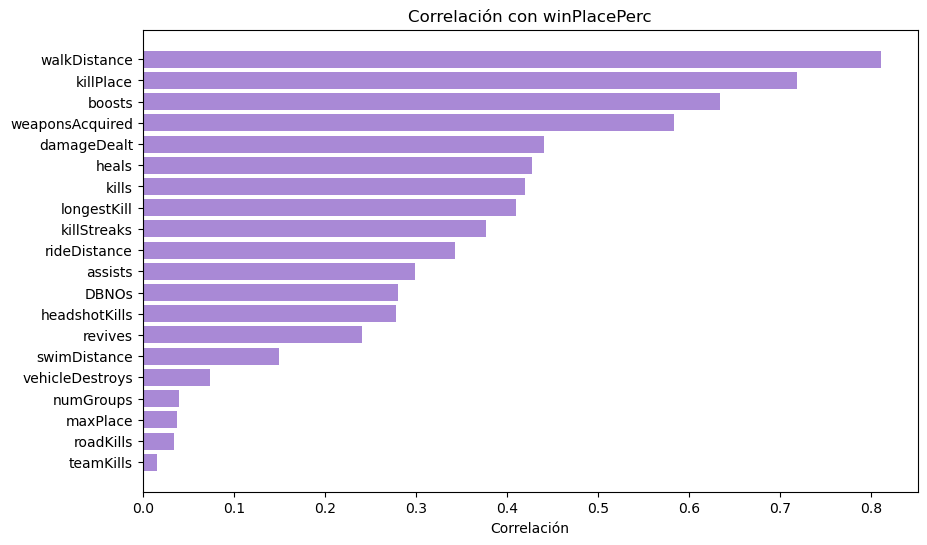

In [18]:
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con winPlacePerc')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

In [ ]:
# df_pubg['winPlacePerc_Log'] = np.log(df_pubg['winPlacePerc'])
#plt.figure()
#sns.histplot(data = df_pubg,
            bins = 30,
            alphna = 0.25,
            kde = True,
            stat = 'probability',
            color = '#B76BCB')
# plt.title('Distribución de winPlacePerc transformada a logaritmo')

### walkDistance

 distancia total recorrida a pie medida en metros.

conforme avanza el juego, se deben de ir moviendo y ejecutando acciones que repercuten en el entorno y los demás jugadores



Text(0, 0.5, 'walkdistance')

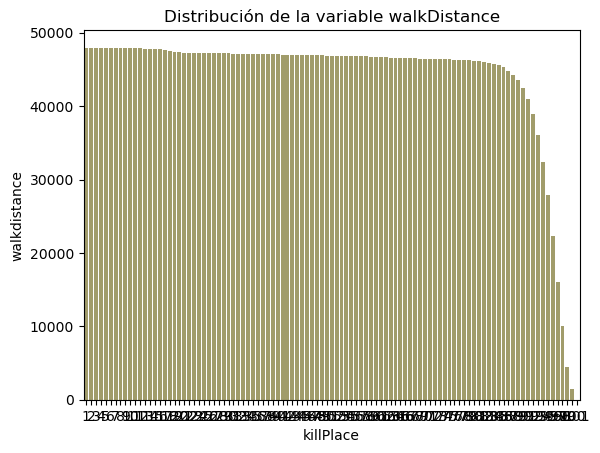

In [19]:
plt.figure()
sns.countplot(data = df_pubg,
              x = 'killPlace',
              color = '#AAA362')
plt.title('Distribución de la variable walkDistance')
plt.ylabel('walkdistance')

### killplace
 clasificación en la partida del número de jugadores enemigos asesinados.


Se logra apreciar gráficamente que, al estar más cercano al primer lugar de la clasificación (izquierda), mayor distancia se recorrió dentro del juego, y los jugadores que son eliminados rápidamente, son los que menos distancia recorrida realizan.

In [20]:
df_pubg['walkDistance'].describe().round()

count    4446966.0
mean        1154.0
std         1183.0
min            0.0
25%          155.0
50%          686.0
75%         1976.0
max        25780.0
Name: walkDistance, dtype: float64

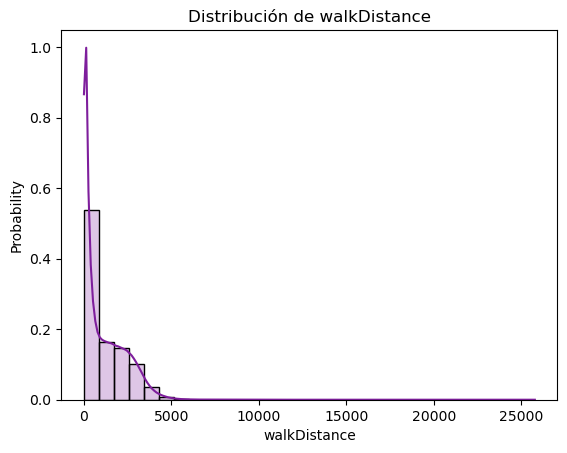

In [21]:
plt.figure()
sns.histplot(data = df_pubg,
            x = 'walkDistance',
            bins = 30,
            alpha = 0.25,
            kde = True,
            stat = 'probability',
            color = '#7E1E9C')
df=plt.title('Distribución de walkDistance')

C:\Users\david\miniconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribución de walkDistance transformada en logaritmo')

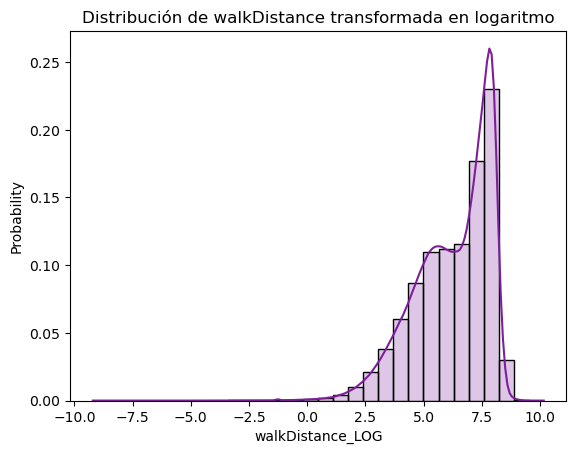

In [22]:
df_pubg['walkDistance_LOG'] = np.log(df_pubg['walkDistance'])
plt.figure()
sns.histplot(data = df_pubg,
            x = 'walkDistance_LOG',
            bins = 30,
            alpha = 0.25,
            kde = True,
            stat = 'probability',
            color = '#7E1E9C')
plt.title('Distribución de walkDistance transformada en logaritmo')

De esta manera se visualiza de mejor manera la relación que se mostraba previamente en la correlación

Text(0.5, 1.0, 'Distribución de killPlace transformada en logaritmo')

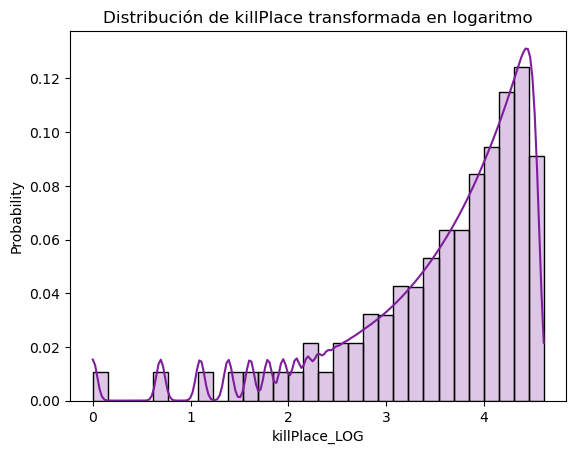

In [25]:
df_pubg['killPlace_LOG'] = np.log(df_pubg['killPlace'])
plt.figure()
sns.histplot(data = df_pubg,
            x = 'killPlace_LOG',
            bins = 30,
            alpha = 0.25,
            kde = True,
            stat = 'probability',
            color = '#7E1E9C')
plt.title('Distribución de killPlace transformada en logaritmo')

Text(0.5, 1.0, 'Relación entre distancia recorrida y ranking por muertes')

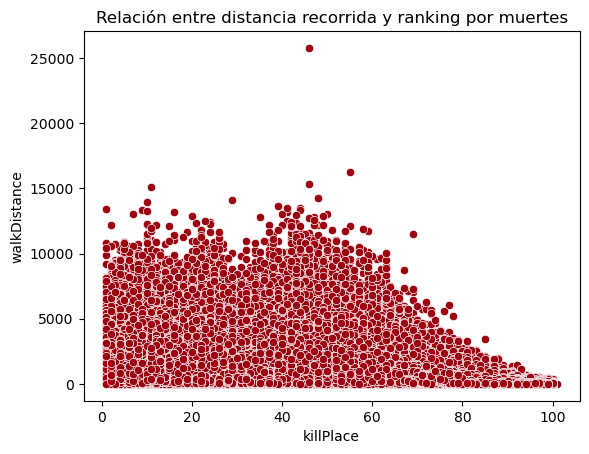

In [23]:
sns.scatterplot(data = df_pubg,
               x = 'killPlace',
               y = 'walkDistance',
               color = '#9c000F')
plt.title('Relación entre distancia recorrida y ranking por muertes')

Text(0.5, 1.0, 'Relación entre distancia recorrida y ranking por muertes')

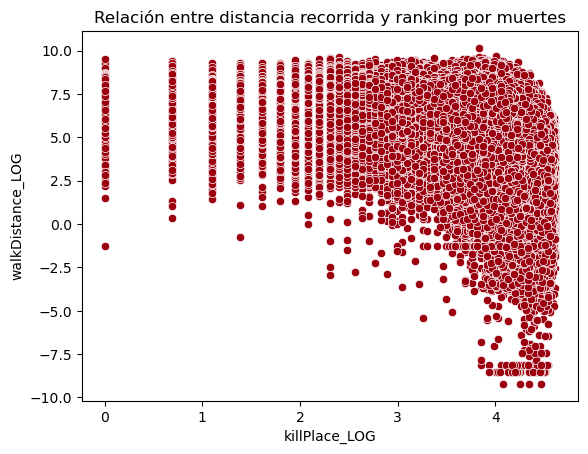

In [26]:
sns.scatterplot(data = df_pubg,
               x = 'killPlace_LOG',
               y = 'walkDistance_LOG',
               color = '#9c000F')
plt.title('Relación entre distancia recorrida y ranking por muertes')

### Conclusiones:
El tratar de generar el logaritmo de la variable principal "winPlacePerc", el kernel se quedaba congelado y debido a eso, intenté de generar el análsisi con las 2 variables mayor relacionadas con ella, de tal modo, se generó la información previa.
Podemos observar que al generar la gráfica con ambos logartimos, no refleja de mejor manera la relación entre ambas variables. De tal modo que, la primer gráfica (sin utilziar el logaritmo), ilustra de derecha a izquierda, el posicionamiento de la probabilidad de terminar la partida en último lugar o en el primero y que se distribuye de la manera en que los jugadores conforme pasa el tiempo y recorren el mapa. 